# Question 1

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt # for plots
import h5py # to be able to use v 7.3 .mat file in the Python 
from scipy.optimize import curve_fit # Python equivalent of lsqcurvefit 
from scipy.stats import spearmanr #  Spearman correlation coefficient calculation

/Users/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# QUESTION 1
print('QUESTION 1\n')

QUESTION 1



In [3]:
with h5py.File('hw3_data1.mat', 'r') as file:
    data_keys = list(file.keys())

data = dict()
with h5py.File('hw3_data1.mat', 'r') as file:
    for key in data_keys:
        data[key] = np.array(file[key]).flatten()
        print('Shape of the data associated with %s:\n' % 
              key, np.shape(data[key]), '\n')

Shape of the data associated with resp1:
 (200,) 

Shape of the data associated with resp2:
 (200,) 



In [4]:
# PART A 
print('PART A\n')

PART A



In [5]:
y = data['resp2'] # output
N = np.size(y)
X_raw = data['resp1'] # regressor
# append the bias terms to the regressor
X = X_raw.reshape((N, 1))
X = np.concatenate((X, np.ones((N, 1))), axis=1)

In [6]:
def OLS(y, X):
    """
    Given the matrix containing the data labels y, and the matrix
    containing the regressors X; computes the optimal weight vector
    such that the meas squared error (MSE) is minimized.
    Args:
        y: The data labels
        X: The regressors
    Returns 
        w_optimal: The optimal weight vector
    """
    w_optimal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w_optimal

In [7]:
w_optimal = OLS(y, X)
print('The optimal weight vector that minimizes the mean squared error '
      'for the linear model is:\n w_optimal = [a, b] =', 
      w_optimal)

The optimal weight vector that minimizes the mean squared error for the linear model is:
 w_optimal = [a, b] = [ 0.29820552 67.03397361]


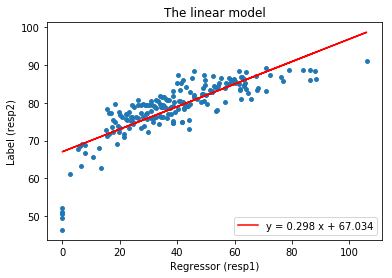

In [8]:
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.scatter(X_raw, y, s=15) 
pred = X.dot(w_optimal)
plt.plot(X_raw, pred, color='r')
plt.title('The linear model')
plt.ylabel('Label (resp2)')
plt.xlabel('Regressor (resp1)')
plt.legend(['y = %1.3f x + %1.3f' % (w_optimal[0], w_optimal[1])],
          loc='lower right')
plt.show(block=False)

In [9]:
def test_model(y, pred):
    """
    Test a given linearized model by computing the coefficient
    of determination (R^2). Returns the explained variance, 
    unexplained variance and R^2.
    Args:
        y: The data labels
        pred: The predicted valus
    Returns:
        e_var: The explained variance
        u_var: The unexplained variance
        R2: The coefficient of determination
    """
    mean_y = np.mean(y)
    N = np.size(y)
    total_var = np.sum((y - mean_y) ** 2) / (N - 1)
    u_var = np.sum((y - pred) ** 2) / (N - 1)
    temp = total_var - u_var
    R2 = 100 * (temp / total_var)
    return R2 / 100, u_var, R2

In [10]:
e_var, u_var, R2 = test_model(y, pred)
print('Explained variance of the linear model:', e_var)
print('Unexplained variance of the linear model:', u_var)
print('Coefficient of determination of the linear model:', R2)

Explained variance of the linear model: 0.6579235991547004
Unexplained variance of the linear model: 17.464077534973946
Coefficient of determination of the linear model: 65.79235991547004


In [11]:
R = np.sqrt(R2)
pearson = np.corrcoef(y, X_raw)[0, 1]
print('The value of R:', R)
print('The value of pearson correlation between '
      'the label and the regressor:', pearson)

The value of R: 8.111248973830728
The value of pearson correlation between the label and the regressor: 0.8111248973830725


In [12]:
# PART B
print('PART B\n')

PART B



In [13]:
X_order2 = (X_raw ** 2).reshape((N, 1))
X_order2 = np.concatenate((X_order2, X), axis=1)

In [14]:
w_optimal_order2 = OLS(y, X_order2)
print('The optimal weight vector that minimizes the mean squared error for '
      'the linearized second order model is:\nw_optimal_order2 = [a, b, c] =', 
      w_optimal_order2)

The optimal weight vector that minimizes the mean squared error for the linearized second order model is:
w_optimal_order2 = [a, b, c] = [-4.42550345e-03  6.80811071e-01  6.04930517e+01]


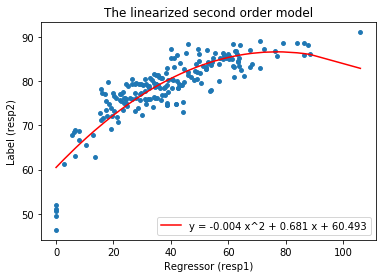

In [15]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(X_raw, y, s=15) 
order = np.argsort(X_raw)
X_sorted = X_raw[order]
pred = X_order2.dot(w_optimal_order2)
plt.plot(X_sorted, pred[order], color='r')
plt.title('The linearized second order model')
plt.ylabel('Label (resp2)')
plt.xlabel('Regressor (resp1)')
plt.legend(['y = %1.3f x^2 + %1.3f x + %1.3f' % 
            (w_optimal_order2[0], w_optimal_order2[1],
             w_optimal_order2[2])], loc='lower right')
plt.show(block=False)

In [16]:
e_var, u_var, R2 = test_model(y, pred)
print('Explained variance of the linearized second order model:', e_var)
print('Unexplained variance of the linearized second order model:', u_var)
print('Coefficient of determination of the linearized second order:', R2)

Explained variance of the linearized second order model: 0.769297670953405
Unexplained variance of the linearized second order model: 11.778080428853912
Coefficient of determination of the linearized second order: 76.9297670953405


In [17]:
R = np.sqrt(R2)
spearman = spearmanr(y, X_raw)
print('The value of R:', R)
print('The value of spearman correlation coefficient between '
      'the labels and the regressor:', spearman.correlation)

The value of R: 8.770961583278112
The value of spearman correlation coefficient between the labels and the regressor: 0.8488520877167255


In [18]:
# PART C
print('PART C\n')

PART C



In [19]:
def parametric_nonlinear_model(x, a, n, b):
    """
    An implementation of the parametric nonlinear model y = a * x^n + b 
    that will be used in the curve_fit 
    function.
    Args:
        x: The input value
        a, n, b: Parameters of the function that will be optimized
    Returns:
        result: The resulting y value
    """
    return a * (x ** n) + b

In [20]:
w_optimal_parametric, _ = curve_fit(parametric_nonlinear_model,
                                     X_raw, y, p0=[1, 1, 0])
a_optimal = w_optimal_parametric[0]
n_optimal = w_optimal_parametric[1]
b_optimal = w_optimal_parametric[2]
print('The optimal values in the parametric nonlinear model (starting from (1, 1, 0)):'
      '\n a = %f, n = %f, b = %f' % (a_optimal, n_optimal, b_optimal))

The optimal values in the parametric nonlinear model (starting from (1, 1, 0)):
 a = 9.575555, n = 0.313148, b = 49.812369


In [21]:
w_optimal_parametric_, _ = curve_fit(parametric_nonlinear_model,
                                     X_raw, y, p0=[10, 7, 100])
a_optimal_ = w_optimal_parametric[0]
n_optimal_ = w_optimal_parametric[1]
b_optimal_ = w_optimal_parametric[2]
print('The optimal values in the parametric nonlinear model (starting from (10, 7, 100):'
      '\n a = %f, n = %f, b = %f' % (a_optimal_, n_optimal_, b_optimal_))

The optimal values in the parametric nonlinear model (starting from (10, 7, 100):
 a = 9.575555, n = 0.313148, b = 49.812369


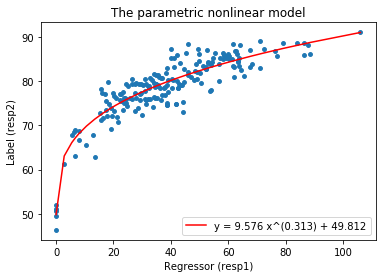

In [22]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(X_raw, y, s=15) 
pred = parametric_nonlinear_model(X_raw, a_optimal, n_optimal, b_optimal)
plt.plot(X_sorted, pred[order], color='r')
plt.title('The parametric nonlinear model')
plt.ylabel('Label (resp2)')
plt.xlabel('Regressor (resp1)')
plt.legend(['y = %1.3f x^(%1.3f) + %1.3f' % 
            (a_optimal, n_optimal, b_optimal)], loc='lower right')
plt.show(block=False)

In [23]:
e_var, u_var, R2 = test_model(y, pred)
print('Explained variance of the parametric nonlinear model:', e_var)
print('Unexplained variance of the parametric nonlinear model:', u_var)
print('Coefficient of determination of the parametric nonlinear model:', R2)

Explained variance of the parametric nonlinear model: 0.8558746842166239
Unexplained variance of the parametric nonlinear model: 7.358051252216542
Coefficient of determination of the parametric nonlinear model: 85.5874684216624


In [24]:
# PART D
print('PART D')

PART D


In [25]:
def nearest_neighbor_regression(y, X):
    """
    Performs nonlinear regression based on the nearest neighbor
    approach, meaning that the function predicts the label of the
    closest regressor for each input. 
    Args:
        y: The data labels
        X: The regressors
    Returns:
        pred: The predicted valus
    """
    pred = np.zeros(np.size(y))
    for index, x in enumerate(X):
        index_of_nearest = np.abs(X - x).argmin()
        pred[index] =  y[index_of_nearest]
    return pred

In [26]:
pred = nearest_neighbor_regression(y, X_raw)

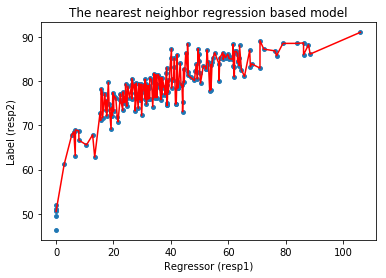

In [27]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(X_raw, y, s=15) 
plt.plot(X_sorted, pred[order], color='r')
plt.title('The nearest neighbor regression based model')
plt.ylabel('Label (resp2)')
plt.xlabel('Regressor (resp1)')
plt.show(block=False)

In [28]:
e_var, u_var, R2 = test_model(y, pred)
print('Explained variance of the nearest neighbor regression based model:', e_var)
print('Unexplained variance of the nearest neighbor regression based model:', u_var)
print('Coefficient of determination nearest neighbor regression based model:', R2)

Explained variance of the nearest neighbor regression based model: 0.9979301090423391
Unexplained variance of the nearest neighbor regression based model: 0.10567445191836249
Coefficient of determination nearest neighbor regression based model: 99.79301090423391


In [29]:
plt.show()